In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

In [33]:
data=pd.read_csv(r"C:\Users\venka\Downloads\traffic volume.csv")

In [34]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [35]:
data.shape

(48204, 8)

In [36]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [38]:
data.isnull().sum()

holiday            0
temp              53
rain               2
snow              12
weather           49
date               0
Time               0
traffic_volume     0
dtype: int64

In [39]:
from collections import Counter

In [40]:

data['temp'].fillna(data['temp'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)

In [41]:
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [46]:
corr=data.corr()

In [47]:

cor

,temp,rain,snow,traffic_volume
temp,1.000000,0.009070,-0.019758,0.130034
rain,0.009070,1.000000,-0.000090,0.004714
snow,-0.019758,-0.000090,1.000000,0.000735
traffic_volume,0.130034,0.004714,0.000735,1.000000


<AxesSubplot:>

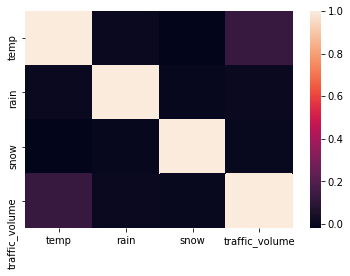

In [48]:
sns.heatmap(corr)

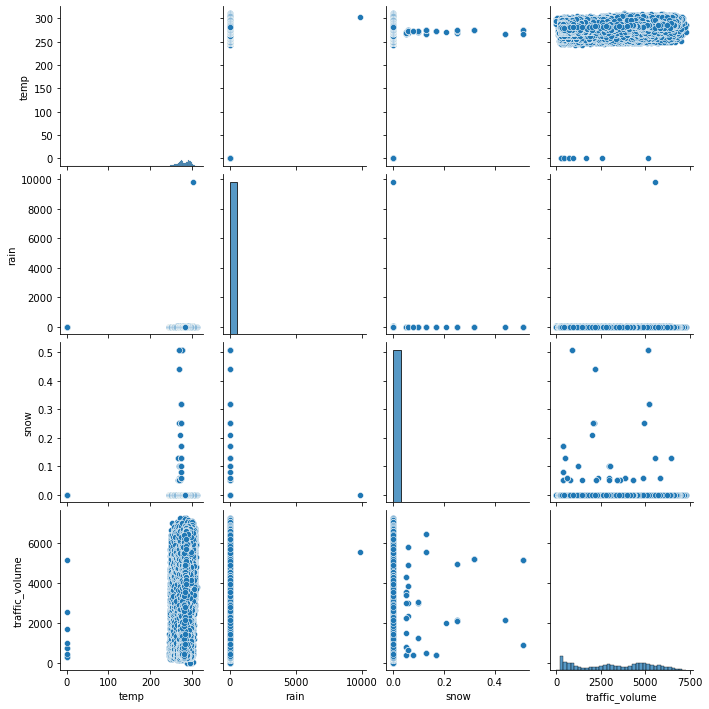

In [49]:
sns.pairplot(data)

<AxesSubplot:>

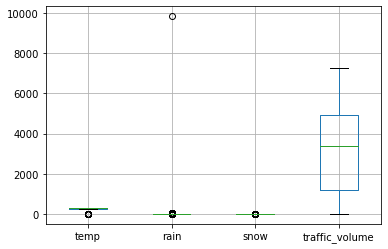

In [50]:
data.boxplot()

In [51]:
data[["day","month","year"]]=data["date"].str.split("-",expand=True)
data[["hours","minutes","seconds"]]=data["Time"].str.split(":",expand=True)

In [52]:
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [53]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,None,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,None,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,None,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,None,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,None,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00


In [54]:
y = data['traffic_volume']
x = data.drop('traffic_volume',axis=1)

In [55]:
names=x.columns

In [56]:
from sklearn.preprocessing import scale


In [57]:
from sklearn.preprocessing import LabelEncoder
for col in x.select_dtypes(include=['object']).columns:
    x[col]=LabelEncoder().fit_transform(x[col].astype(str))

In [58]:
x=scale(x)

In [59]:
x=pd.DataFrame(x,columns=names)

In [60]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.015856,0.530485,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.015856,0.611467,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.015856,0.627964,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.015856,0.669205,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.015856,0.744939,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [63]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [64]:
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
Rand=ensemble.RandomForestRegressor()
svr=svm.SVR()
XGB=xgboost.XGBRegressor()

In [65]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston  
import pandas as pd


data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

lin_reg = LinearRegression()
Dtree = DecisionTreeRegressor()
Rand = RandomForestRegressor()
svr = SVR()
XGB = XGBRegressor()

lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [67]:
p1 = lin_reg.predict(x_train)  
p2 = Dtree.predict(x_train)     
p3 = Rand.predict(x_train)      
p4 = svr.predict(x_train)      
p5 = XGB.predict(x_train)      

In [68]:
from sklearn import metrics

print(metrics.r2_score(p1, y_train)) 
print(metrics.r2_score(p2, y_train))  
print(metrics.r2_score(p3, y_train))  
print(metrics.r2_score(p4, y_train))  
print(metrics.r2_score(p5, y_train)) 

0.6682392734758833
1.0
0.9746477287893012
-4.532772607198302
0.9999969820466211


In [72]:
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)  
p3 = Rand.predict(x_test)    
p4 = svr.predict(x_test)     
p5 = XGB.predict(x_test)     

In [73]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

0.6333247469014356
0.8271962598061354
0.8621119208758622
-2.6494900736125144
0.8869151458156154


In [74]:
MSE = metrics.mean_squared_error(p3,y_test)

In [75]:
np.sqrt(MSE)

2.913009024776851

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import pickle
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))